In [2]:
# Import Library

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

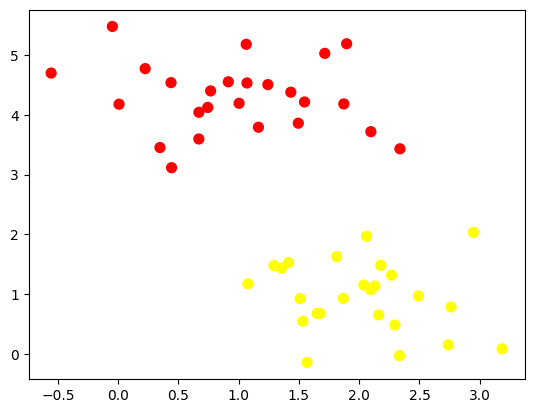

In [3]:
from sklearn.datasets import make_blobs

# Kode diatas digunakan untuk melakukan import sebuah dataset sintetis dari sklearn yaitu make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)

# Kode diatas digunakan untuk membuat suatu dataset sintetis yang berjumlah sebanyak 50 sample/titik dengan 2 cluster/center di dalamnya dan memiliki standar deviasi per cluster sebanyak 0.6

plt.scatter(X[:, 0], X[: , 1], c=y, s=50, cmap='autumn')

# Kode diatas diguankan untuk membuat scatter plot dari dataset yang telah dibuat dengan sumbu x adalah X[:, 0] dan sumbu y adalah X[:, 1] dengan warna berdasarkan label y dan ukuran titik sebesar 50

(-1.0, 3.5)

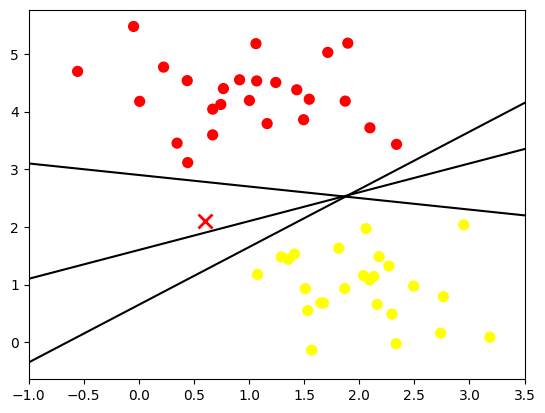

In [5]:
# Membuat sebuah model klasifikasi
xfit = np.linspace(-1, 3.5)

# Kode diatas digunakan untuk membuat sebuah array yang berisi nilai dari -1 sampai 3.5

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

# Penjelasan kode diatas
# plt.scatter digunakan untuk membuat scatter plot dari dataset
# plt.plot digunakan untuk menambahkan suatu titik khusus pada plot dengan koordinat 0.6 dan 2.1

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
    
# Kode diatas digunakan untuk membuat garis lurus dengan persamaan y = mx + b dengan nilai m dan b yang telah ditentukan

plt.xlim(-1, 3.5)

# Kode diatas digunakan untuk mengatur batas sumbu bawah x dan sumbu atas x sehingga elemen dapat ditampilkan dengan jelas

(-1.0, 3.5)

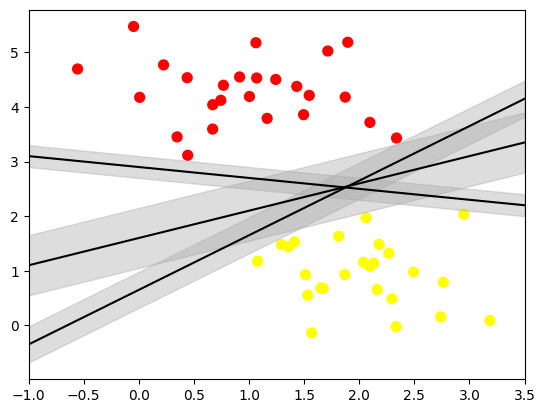

In [6]:
# Membuat margin pada garis

xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit + d, yfit - d, edgecolor='none', color='#AAAAAA', alpha=0.4)

# Penjelasan kode diatas
# Kode diatas digunakan untuk membuat margin pada garis lurus dengan nilai m(garis miring) dan b(intercept) yang sudah ditentukan dan deviasi antara margin dengan garis lurus
    
plt.xlim(-1, 3.5)

## Penerapan fitting SVM

In [7]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [8]:
# Membuat function untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Membuat grid untuk melakukan evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # Digunakan untuk membuat grid 2D dari array x dan y
    xy = np.vstack([X.ravel(), Y.ravel()]).T # Digunakan untuk menggabungkan dua array menjadi satu array 2D
    P = model.decision_function(xy).reshape(X.shape) # Digunakan untuk mengubah array xy dari mengambil sebuah keputusan menjadi array 2D

    # Plot batas dan margin
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vector
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

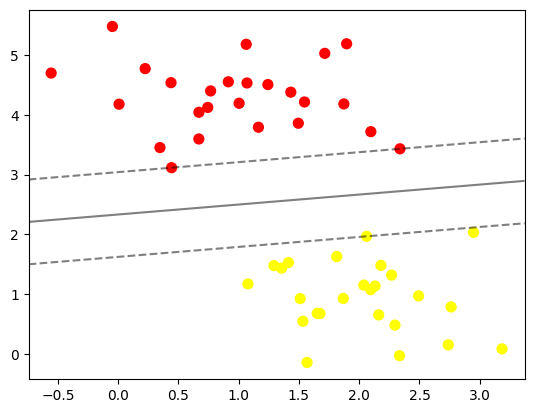

In [9]:
# Menjalankan function pembuatan plot untuk SVC
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

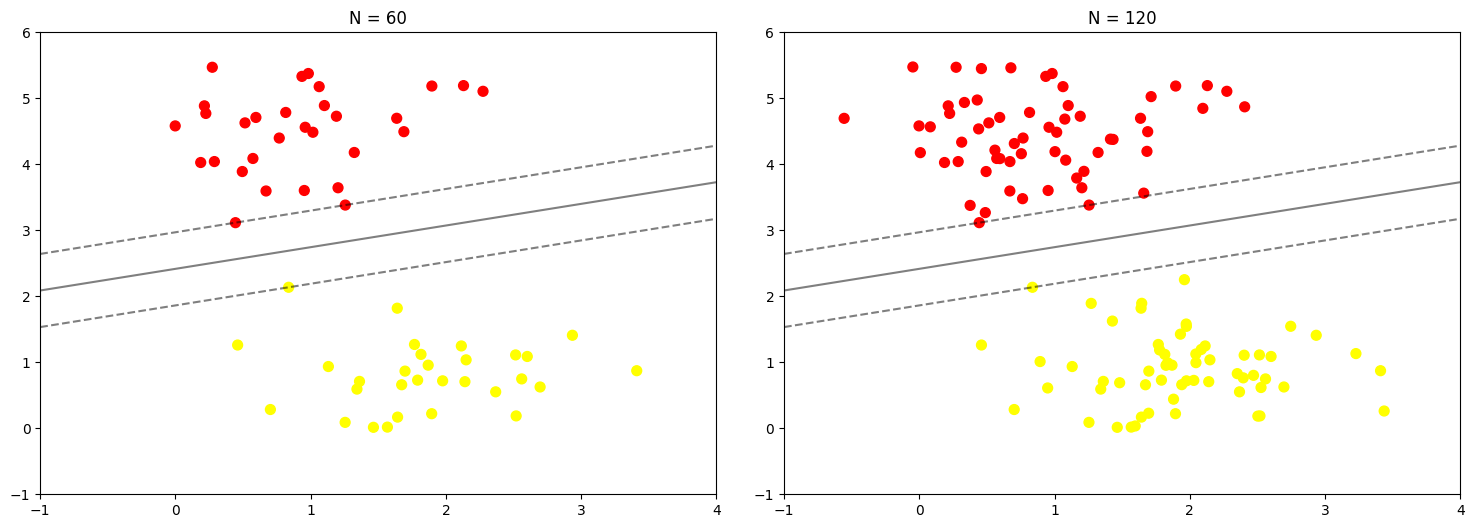

In [10]:
def plot_svm(N=10, ax = None):
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    
    X = X[:N]
    y = y[:N]
    
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))
        

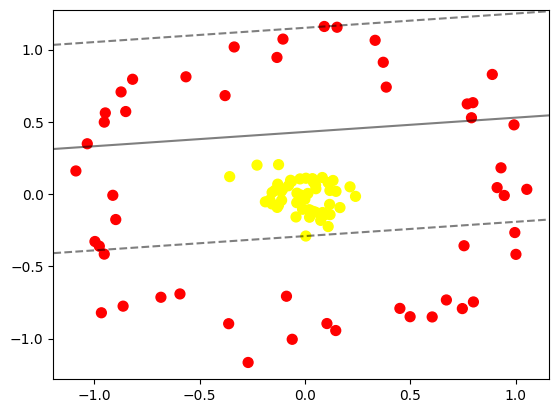

In [11]:
# Contoh data tidak terpisah secara linear
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False)

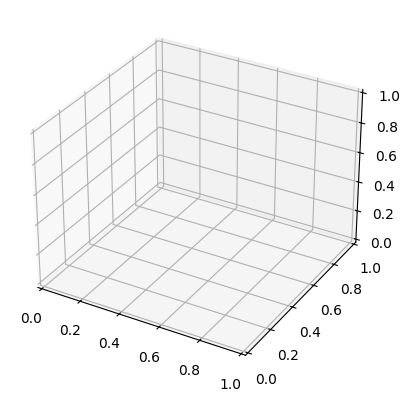

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-9.47766328e-01,  5.61882455e-01],
       [ 1.47528365e-01,  1.92694517e-02],
       [-1.08744939e+00,  1.60449560e-01],
       [ 7.97591205e-01,  6.32717398e-01],
       [ 1.52546364e-01,  1.15466034e+00],
       [ 9.92801108e-01,  4.79304588e-01],
       [ 7.49873086e-02, -1.81441466e-01],
       [ 8.00115101e-01, -7.45792390e-01],
       [ 2.06181995e-02, -1.07896981e-01],
       [ 5.07459680e-02,  6.23223515e-02],
       [-8.75823805e-02, -7.06437022e-01],
       [ 9.85000613e-02, -1.40198166e-01],
       [-3.35783279e-01,  1.01814636e+00],
       [ 1.10086746e-01,  7.99146500e-02],
       [-6.02665249e-02, -1.00433051e+00],
       [ 1.46395052e-01, -9.43703826e-01],
       [ 3.33438109e-01,  1.06421952e+00],
       [ 8.38406494e-02, -1.27283301e-01],
       [ 2.40273742e-01, -1.54712589e-02],
       [-3.77672533e-02,  6.74163888e-03],
       [ 1.33384814e-01,  9.43620275e-02],
       [-7.82455640e-02,  5.80496631e-02],
       

In [18]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], rstride=50, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180), X=fixed(X), y=fixed(y))

In [19]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

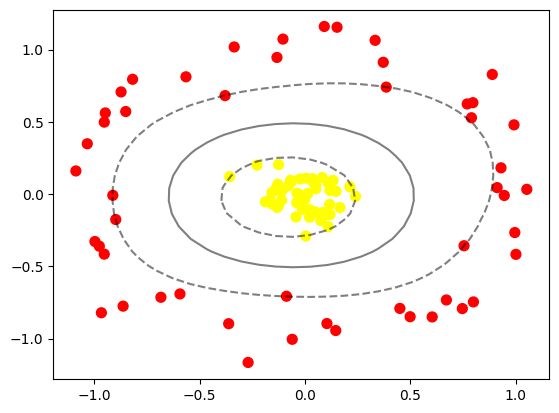

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Data overlay

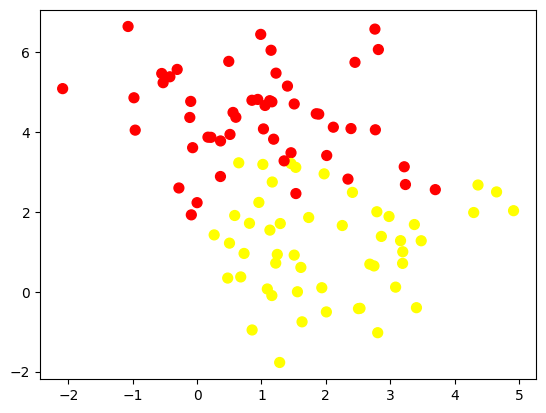

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

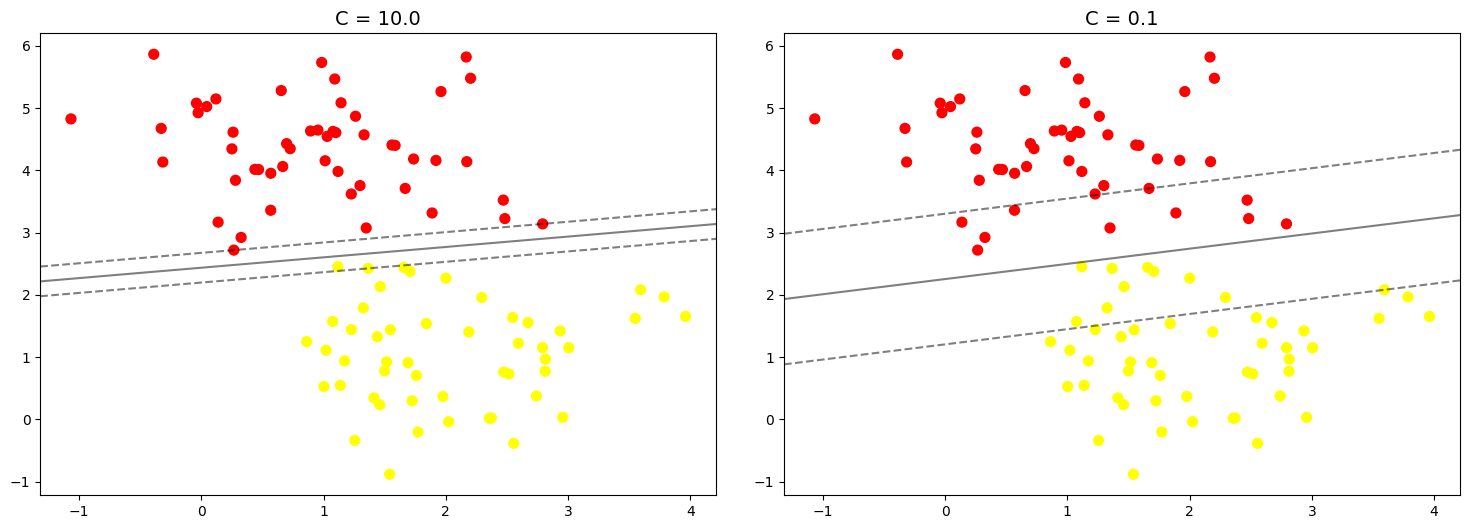

In [22]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)